In [1]:
import os
import time

import numpy as np
import pandas 
import geopandas


from shapely.geometry import Point, Polygon
from shapely.ops import unary_union

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
# from matplotlib.patches import FancyBboxPatch, BoxStyle
# from matplotlib.path import Path
# import re
# from pprint import pprint

thisyear = 2018

script_dir = '/home/idies/workspace/Storage/raddick/jordanraddick.com/gerrymandering/'
data_dir = '/home/idies/workspace/Storage/raddick/jordanraddick.com/gerrymandering/districts_with_data/'
# output_dir = data_dir

# acs5_dir = '/home/idies/workspace/Temporary/raddick/census_scratch/acs5/{0:.0f}/estimates/'.format(thisyear)
shapefiledir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/{0:.0f}/'.format(thisyear)
extras_dir = '/home/idies/workspace/Storage/raddick/census/extras/'
# #separated_roads_dir = output_dir = '/home/idies/workspace/Temporary/raddick/jordanraddick.com_temp/roads/{0:}/'.format(this_state.lower())


# #water_area_tol = 1 * 1000 * 1000
# #overlap_area_tract_tol = 22000
# overlap_area_bg_tol = 4000
# #smallest tract in US is Cook County, Illinois Tract 307.02 (area = 22,094 m^2)
# #smallest block group in US is Miami-Dade County, FL, Census Tract 2703, block group 7 (area = 4,436 m^2)
# equal_area_crs = {'init': 'epsg:2163'}  # An equal area projection: https://epsg.io/2163

# #scale = 1
basesize = 96
map_buffer_ratio = 0.5

# #plt.rc('axes', prop_cycle=default_cycler)

district_color_cycle = ['red', 'green', 'orange', 'cyan', 'yellow', 'pink', 'gray', 'lime', 'navajowhite', 'cornflowerblue', 'darkseagreen', 'thistle', 'tomato', 'silver']
inverse_color_cycle = ['green', 'red', 'navy', 'black', 'purple', 'lime', 'black', 'maroon', 'seagreen', 'black', 'red', 'black', 'black', 'black']

debug = 1
g = 0




def makebox(manual_xlim, manual_ylim):

    points = []
    points.append(Point(manual_xlim[0],manual_ylim[1]))
    points.append(Point(manual_xlim[1],manual_ylim[1]))
    points.append(Point(manual_xlim[1],manual_ylim[0]))
    points.append(Point(manual_xlim[0],manual_ylim[0]))
    
    coords = [(p.x, p.y) for p in points]    
    metrobox = Polygon(coords)
    
    return metrobox 

# def parse_road_name(thename):
#     try:
#         annotator = thisrow['FULLNAME'][re.search('\d',thisrow['FULLNAME']).start():]
#     except AttributeError:
#         try: 
#             annotator = thisrow['FULLNAME'][re.search('Hwy',thisrow['FULLNAME']).end():]
#         except AttributeError:
#             annotator = thisrow['FULLNAME']
#     return annotator

# # we may derive from matplotlib.patches.BoxStyle._Base class.
# # You need to override transmute method in this case.
# class shield(BoxStyle._Base):
#     """
#     A simple box.
#     """

#     def __init__(self, pad=0.3):
#         """
#         The arguments need to be floating numbers and need to have
#         default values.

#          *pad*
#             amount of padding
#         """

#         self.pad = pad
#         super().__init__()

#     def transmute(self, x0, y0, width, height, mutation_size):
#         """
#         Given the location and size of the box, return the path of
#         the box around it.

#          - *x0*, *y0*, *width*, *height* : location and size of the box
#          - *mutation_size* : a reference scale for the mutation.

#         Often, the *mutation_size* is the font size of the text.
#         You don't need to worry about the rotation as it is
#         automatically taken care of.
#         """

#         # padding
#         pad = mutation_size * self.pad

#         # width and height with padding added.
#         width, height = width + 2.*pad, \
#                         height + 2.*pad,

#         # boundary of the padded box
#         x0, y0 = x0-pad, y0-pad,
#         x1, y1 = x0+width, y0 + height

#         cp = [(0.5*(x0+x1), (y0-2.*pad)), # bottom
#               (x1, y0),  # right lower-mid
#               (x1+pad, (y0+y1)/2.),  # far right mid
#               (x1, y1+pad),  # top right corner
#               ((x0+x1)/2,y1),  # dip from top
#               (x0, y1+pad),  # top left corner
#               (x0-pad, (y0+y1)/2.),    # far left mid
#               (x0, y0),  # left lower-mid
#               ((x0+x1)/2., (y0-2.*pad)),  # return to bottom
#               ((x0+x1)/2., (y0-2.*pad))]
        
        
#         com = [Path.MOVETO,  # start
#                Path.CURVE4, # curve to right mid
#                Path.LINETO,  # line to far right mid
#                Path.LINETO, # line to top right corner
#                Path.CURVE3,  # line to dip
#                Path.LINETO,  # line to top left corner
#                Path.CURVE4,   # curve to far left mid
#                Path.LINETO,   # line to left lower-mid
#                Path.LINETO,
#                Path.CLOSEPOLY]

#         path = Path(cp, com)

#         return path

# BoxStyle._style_list["shield"] = shield

# road_label_format = { 
#     'I': { 'labelsize': 14, 'thecolor': 'red', 'thebbox': dict(boxstyle="shield", fc='blue', ec='red') },     
#     'U': { 'labelsize': 11, 'thecolor': 'black', 'thebbox': dict(boxstyle="shield", fc='white', ec='black') },
#     'S': { 'labelsize': 9, 'thecolor': 'black', 'thebbox': dict(boxstyle="square,pad=0.25", fc='white', ec='black')},
#     'C': { 'labelsize': 10, 'thecolor': 'black', 'thebbox': dict(boxstyle="sawtooth,pad=0.5", fc='white') }, 
#     'M': { 'labelsize': 9, 'thecolor': 'black'},
#     'O': { 'labelsize': 9, 'thecolor': 'red' }
# }
print('ok')


ok


In [2]:
s = time.time()
df = pandas.read_csv(data_dir+'block_group_with_district_1_14.csv', encoding='utf-8', index_col='GEOID')
e = time.time()
g = g + (e-s)
print('Read {0:,.0f} block groups in {1:,.1f} seconds!'.format(len(df), e-s))

Read 118,470 block groups in 1.2 seconds!


In [3]:
s = time.time()

s = time.time()
print('reading congressional districts with urban/rural area data...')
cd_gdf = geopandas.read_file(data_dir+'cd116_with_areas_and_types_435.shp')
cd_gdf.loc[cd_gdf['CD116FP'] == 0, 'CD116FP'] = 1  # At-large districts will be called District 1
cd_gdf = cd_gdf.rename(columns = {'pct_metro_': 'pct_metro_area', 'pct_city_a': 'pct_city_area'})
cd_gdf.loc[:, 'CD116FP'] = cd_gdf['CD116FP'].apply(lambda x: int(x))
cd_gdf = cd_gdf.set_index('GEOID')


cd_gdf = cd_gdf[cd_gdf['STUSAB'] == 'MD']

print('reading block-based districts and block group data...')
bg_file_list = [shapefiledir+'BG/'+x for x in os.listdir(shapefiledir+'BG/') if ((x[-4:] == '.shp'))]
bg_gdf = geopandas.GeoDataFrame()

for i in range(0, len(bg_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(bg_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(bg_file_list)))
    bg_gdf_i = geopandas.read_file(bg_file_list[i])
    bg_gdf = pandas.concat((bg_gdf, bg_gdf_i), axis=0, sort=False)

print('converting block group identifiers and coords to numeric...')
bg_gdf.loc[:, 'STATEFP'] = pandas.to_numeric(bg_gdf['STATEFP'], errors='coerce')
bg_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(bg_gdf['COUNTYFP'], errors='coerce')
bg_gdf.loc[:, 'TRACTCE'] = pandas.to_numeric(bg_gdf['TRACTCE'].apply(lambda x: x[0:4]+'.'+x[4:]), errors='coerce')
bg_gdf.loc[:, 'BLKGRPCE'] = pandas.to_numeric(bg_gdf['BLKGRPCE'], errors='coerce')
bg_gdf.loc[:, 'INTPTLAT'] = pandas.to_numeric(bg_gdf['INTPTLAT'], errors='coerce')
bg_gdf.loc[:, 'INTPTLON'] = pandas.to_numeric(bg_gdf['INTPTLON'], errors='coerce')

#bg_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_gdf['NAME'], errors='coerce')
# bg_gdf = tract_gdf.sort_values(by='NAME')

print('assigning GEOID as index...')
bg_gdf.loc[:, 'GEOID'] = bg_gdf['GEOID'].apply(lambda x: '15000US'+str(x))
bg_gdf = bg_gdf.set_index('GEOID')

s = time.time()

print('looking up state names from numbers...')
state_codes_df = pandas.read_csv(extras_dir+'statecodes.csv')
state_codes_df = state_codes_df.rename(columns={'STATE': 'STATEFP'})
bg_gdf = bg_gdf.reset_index().merge(state_codes_df, how='left', on='STATEFP').set_index('GEOID')


print('looking up county names from numbers...')
county_names_df = pandas.read_excel(extras_dir+'all-geocodes-v2019.xlsx', header=4)
county_names_df = county_names_df[county_names_df['Summary Level'] == 50]
county_names_df = county_names_df.rename(columns={'State Code (FIPS)': 'STATEFP', 'County Code (FIPS)': 'COUNTYFP', 'Area Name (including legal/statistical area description)': 'COUNTY_NAME' })
bg_gdf = bg_gdf.reset_index().merge(county_names_df[['STATEFP', 'COUNTYFP', 'COUNTY_NAME']], how='left', on=['STATEFP', 'COUNTYFP']).set_index('GEOID')

e = time.time()
g = g + (e-s)
print('Added state and county names in {0:,.1f} seconds!'.format(e-s))

e = time.time()
g = g + (e-s)
if (debug >= 1):
    print('Read {0:,.0f} census block groups in {1:,.1f} seconds!'.format(len(bg_gdf), g))



reading congressional districts with urban/rural area data...
reading block-based districts and block group data...
	Reading file 1 of 51...
	Reading file 11 of 51...
	Reading file 21 of 51...
	Reading file 31 of 51...
	Reading file 41 of 51...
	Reading file 51 of 51...
converting block group identifiers and coords to numeric...
assigning GEOID as index...
looking up state names from numbers...
looking up county names from numbers...
Added state and county names in 13.7 seconds!
Read 217,739 census block groups in 28.5 seconds!


In [4]:
s = time.time()

newdf = df[df['STUSAB'] == 'MD'][['congressional_districts_bitmask', 'block_based_district', 'total_population']].join(bg_gdf[bg_gdf['STATEFP'] == 24])
gdf = geopandas.GeoDataFrame(newdf, crs=bg_gdf.crs, geometry='geometry')
state_bounding_box = unary_union(gdf.geometry.tolist()).bounds

print('backing up Maryland GeoDataFrame...')
gdf_bk = gdf

e = time.time()
g = g + (e-s)

if (debug >= 1):
    print('Found {0:,.0f} block groups in Maryland in {1:,.0f} seconds!'.format(len(gdf), e-s))

this_state = 'MD'
this_state_number = 24
#this_state_number = state_codes_df[state_codes_df['STUSAB'] == this_state.upper()].index.values[0]

if (debug >= 1):
    print('reading area water shapefiles in {0:}...'.format(this_state))

water_gdf = geopandas.GeoDataFrame()
water_file_list = [shapefiledir+'AREAWATER/'+x for x in os.listdir(shapefiledir+'AREAWATER/') if ((x[-4:] == '.shp') and ('tl_2018_{0:02d}'.format(this_state_number) in x))]

for i in range(0, len(water_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(water_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(water_file_list)))
    water_gdf_i = geopandas.read_file(water_file_list[i])
    water_gdf = pandas.concat((water_gdf, water_gdf_i), axis=0, sort=False)

water_gdf = water_gdf.set_index('HYDROID')
e = time.time()
g = g + (e-s)

if (debug >= 1):
    print('Read {0:,.0f} bodies of water in {1:,.0f} seconds!'.format(len(water_gdf), e-s))
s = time.time()

if (debug >= 1):
    print('reading place shapefiles in {0:}...'.format(this_state))

place_gdf = geopandas.GeoDataFrame()
place_file_list = [shapefiledir+'PLACE/'+x for x in os.listdir(shapefiledir+'PLACE/') if ((x[-4:] == '.shp') and ('tl_2018_{0:02d}'.format(this_state_number) in x))]

for i in range(0, len(place_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(water_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(place_file_list)))
    place_gdf_i = geopandas.read_file(place_file_list[i])
    
    place_gdf = pandas.concat((place_gdf, place_gdf_i), axis=0, sort=False)

place_gdf.loc[:, 'INTPTLON'] = pandas.to_numeric(place_gdf['INTPTLON'], errors='coerce')
place_gdf.loc[:, 'INTPTLAT'] = pandas.to_numeric(place_gdf['INTPTLAT'], errors='coerce')

place_gdf = place_gdf.set_index('GEOID')

e = time.time()
g = g + (e-s)

if (debug >= 1):
    #print('Read {0:,.0f} bodies of water with area greater than or equal to {1:,.0f} km^2 in {2:,.0f} seconds!'.format(len(water_gdf), water_area_tol/(1000*1000), e-s))
    print('Read {0:,.0f} places in {1:,.1f} seconds!'.format(len(place_gdf), e-s))
#place_gdf.head(1)

s = time.time()

if (debug >= 1):
    print('reading roads shapefiles in {0:}...'.format(this_state))

roads_gdf = geopandas.GeoDataFrame()
roads_file_list = [shapefiledir+'ROADS/'+x for x in os.listdir(shapefiledir+'ROADS/') if ((x[-4:] == '.shp') and ('tl_2018_{0:02d}'.format(this_state_number) in x))]

for i in range(0, len(roads_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(water_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(roads_file_list)))
    roads_gdf_i = geopandas.read_file(roads_file_list[i])
    
    roads_gdf = pandas.concat((roads_gdf, roads_gdf_i), axis=0, sort=False)

roads_gdf = roads_gdf.set_index('LINEARID')

# #roads_gdf.head(1).T
# # Road Types: C = County, I = Interstate, M = Common name, O = Other, S = State hwy, U = US hwy

old_map_buffer_ratio = -1

e = time.time()
g = g + (e-s)

if (debug >= 1):
    print('Read {0:,.0f} roads in {1:,.1f} seconds!'.format(len(roads_gdf), e-s))



backing up Maryland GeoDataFrame...
Found 3,926 block groups in Maryland in 21 seconds!
reading area water shapefiles in MD...
	Reading file 1 of 24...
	Reading file 11 of 24...
	Reading file 21 of 24...
	Reading file 24 of 24...
Read 15,012 bodies of water in 25 seconds!
reading place shapefiles in MD...
	Reading file 1 of 1...
Read 518 places in 0.2 seconds!
reading roads shapefiles in MD...
	Reading file 1 of 24...
	Reading file 11 of 24...
	Reading file 21 of 24...
	Reading file 24 of 24...
Read 265,200 roads in 32.8 seconds!


Aspect ratio: 1.711 : 1


Done


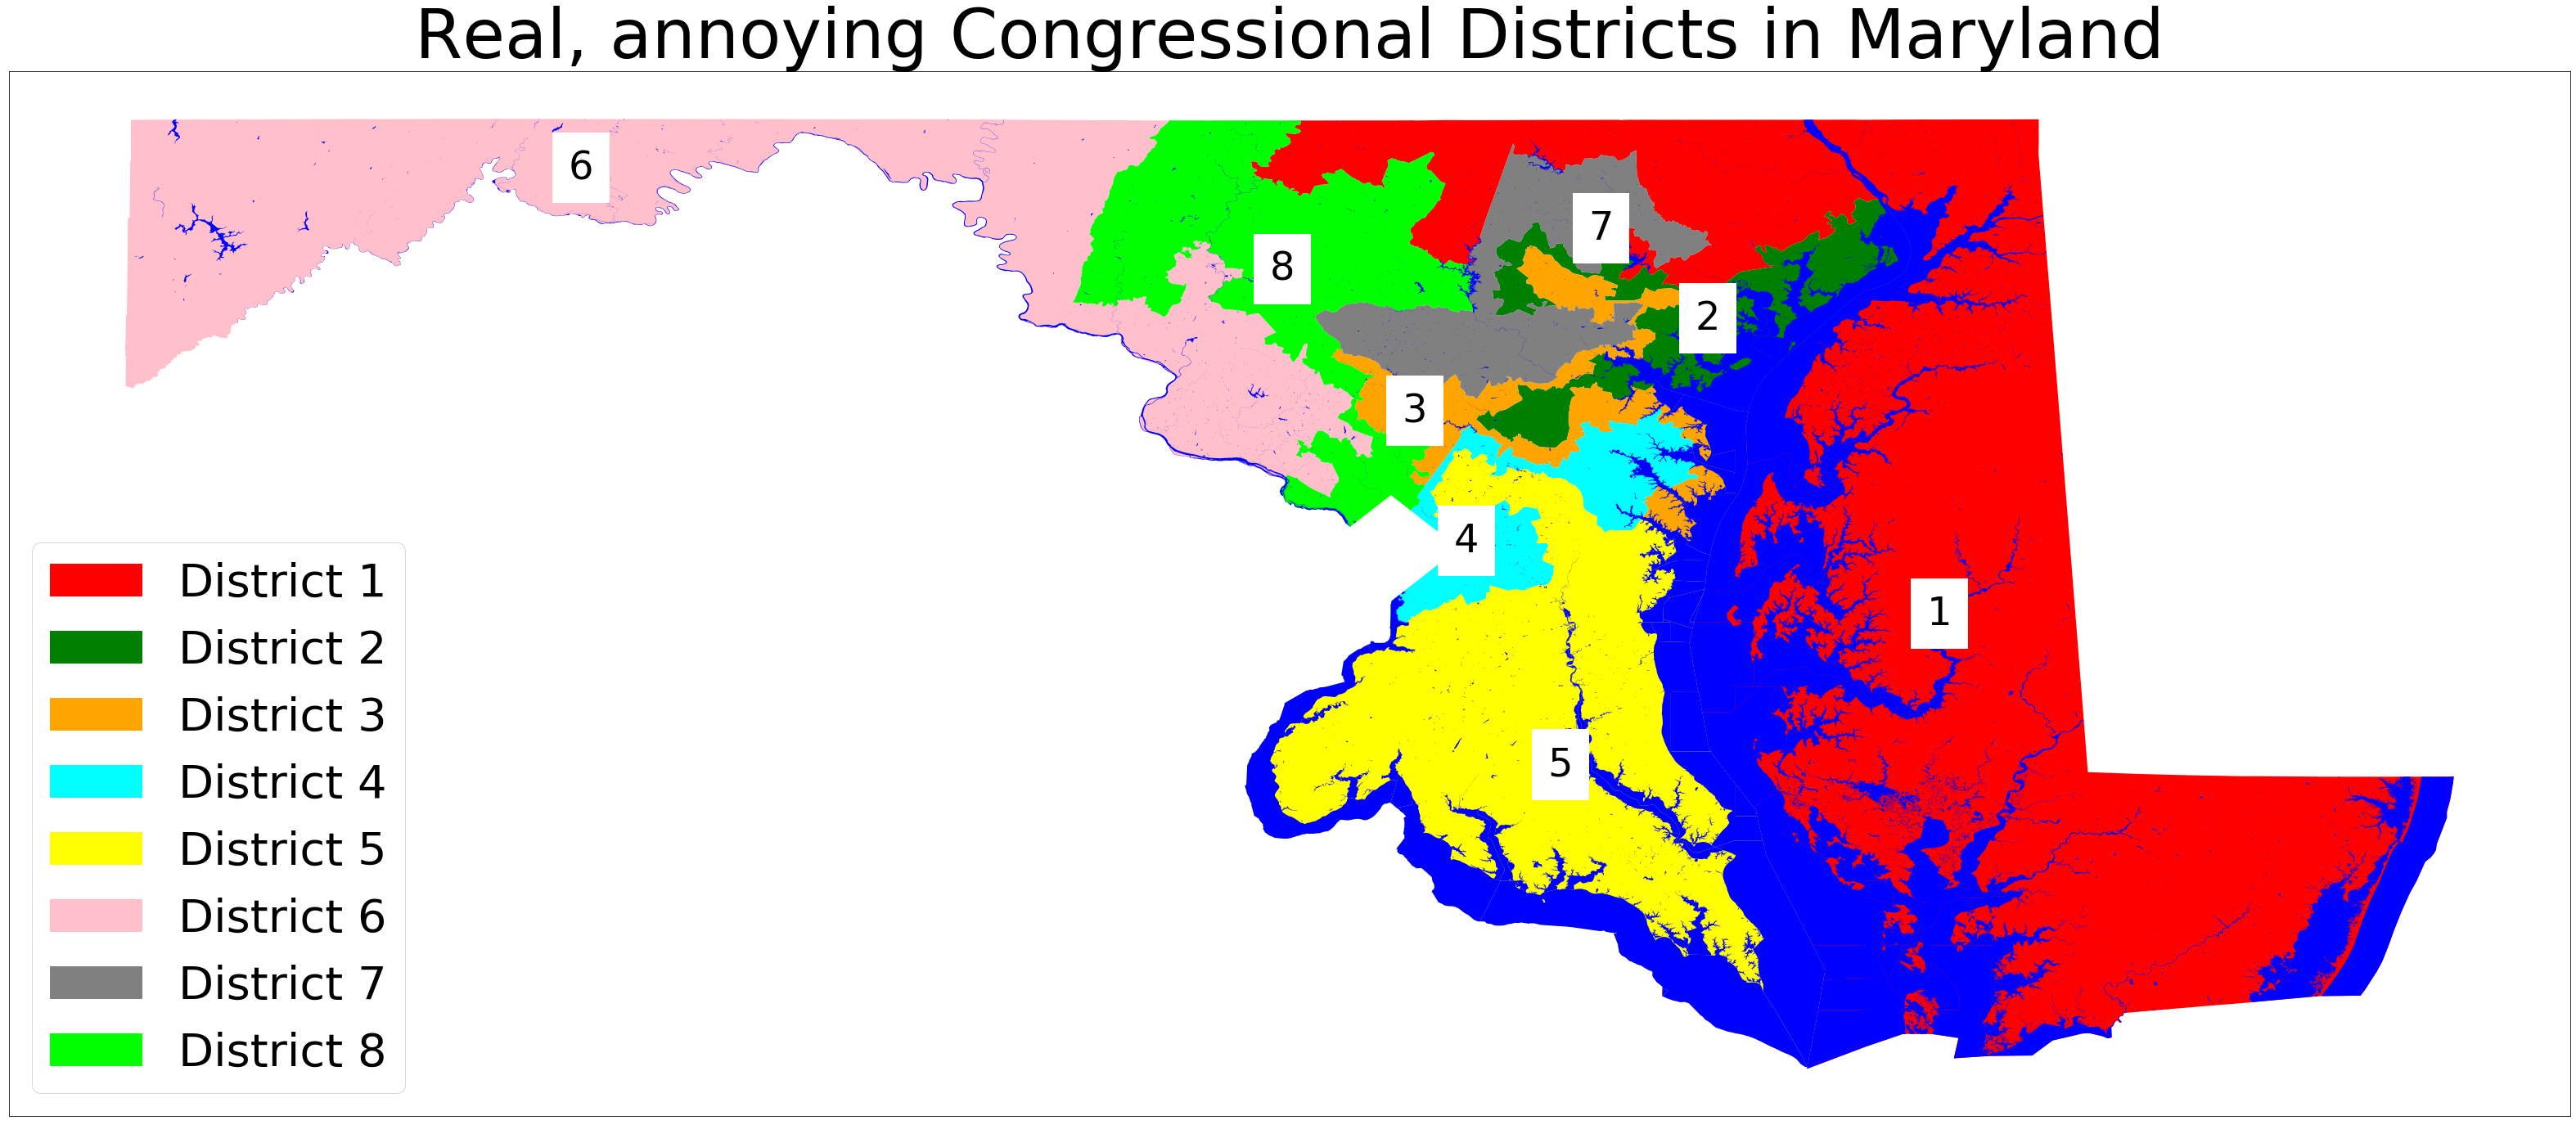

In [5]:
legend_location = 'lower left'
xlimits = gdf.geometry.apply(lambda x: (x.bounds[0], x.bounds[2])).values[0]
ylimits = gdf.geometry.apply(lambda x: (x.bounds[1], x.bounds[3])).values[0]

xspan = xlimits[1] - xlimits[0]
yspan = ylimits[1] - ylimits[0]
aspect_ratio = xspan / yspan

xbuffer = xspan * map_buffer_ratio
ybuffer = yspan * map_buffer_ratio

xlimits = gdf.geometry.apply(lambda x: (x.bounds[0] - xbuffer, x.bounds[2] + xbuffer)).values[0]
ylimits = gdf.geometry.apply(lambda x: (x.bounds[1] - ybuffer, x.bounds[3] + ybuffer)).values[0]


#if ((oldi != i) | (old_map_buffer_ratio != map_buffer_ratio)):
map_area_geo = makebox(xlimits, ylimits)

map_area_gdf = geopandas.GeoDataFrame(data=[[map_area_geo]], columns=['geometry'], crs=gdf.crs, geometry='geometry')

print('Aspect ratio: {0:.3f} : 1'.format(1/aspect_ratio))
print('\n')

fig, ax = plt.subplots(1,1,figsize=(basesize*aspect_ratio,basesize))

legend_list = []
for i in range(1, 9):
    legend_list.append(mpatches.Patch(color=district_color_cycle[i-1], label='District {0:,.0f}'.format(i)))
    cd_gdf[cd_gdf['CD116FP'] == i].plot(ax=ax, color=district_color_cycle[i-1])
    centerpoint = (unary_union(cd_gdf[cd_gdf['CD116FP'] == i].geometry.tolist()).centroid.x, unary_union(cd_gdf[cd_gdf['CD116FP'] == i].geometry.tolist()).centroid.y)
    if (i == 3):
        centerpoint = (centerpoint[0] - .32, centerpoint[1])
    elif (i == 4):
        centerpoint = (centerpoint[0] - .15, centerpoint[1] - .06)
    elif (i == 6):
        centerpoint = (centerpoint[0] - .22, centerpoint[1] + .13)
    elif (i == 7):
        centerpoint = (centerpoint[0] + .16, centerpoint[1] + .11)
    plt.annotate(i, centerpoint, 
                 color='black', backgroundcolor='white', fontsize=48, ha='center', va='center')

water_gdf.plot(ax=ax, color='blue')
ax.legend(handles=legend_list, fontsize=56, loc=legend_location)
plt.title("Real, annoying Congressional Districts in Maryland", fontsize=84)

plt.xticks([])
plt.yticks([])
plt.savefig(script_dir+'maryland-gerrymandering-old.svg', format='svg')
print('Done')

#plt.show()


In [6]:
new_district_population = gdf['total_population'].sum()/8

print('Average population in each district should be: {0:,.0f}'.format(new_district_population))
print('Range for +/- 5 percent: {0:,.0f} - {1:,.0f}'.format(.95*new_district_population, 1.05*new_district_population))



Average population in each district should be: 750,429
Range for +/- 5 percent: 712,908 - 787,951


In [7]:
print('getting from backup...')
gdf = gdf_bk
gdf = gdf.assign(new_district = 0)
gdf.loc[gdf['COUNTY_NAME'].apply(lambda x: 'city' in x.lower()), 'new_district'] = 7

baltimore_cities_list = ['Brooklyn Park', 'Baltimore Highlands', 'Lansdowne', 'Arbutus', 'Parkville', 'Towson']
county_cities_list = ['Ellicott City', 'Ilchester']
aa_cities_list = ['Elkridge', 'Jessup', 'Columbia', 'Scaggsville', 'Savage', 'North Laurel', 'Laurel', 'West Laurel']
pg_cities_list = ['Westphalia', 'Largo', 'Kettering', 'Brock Hall', 'Queen Anne', 'Woodmore', 'Fairwood', 'Bowie', 'Andrews AFB']

montgomery_to_pg_cities_list = ['Burtonsville', 'Fairland', 'Calverton', 'White Oak', 'Hillendale', 'Four Corner', 'Kemp Mill', 'Colesville']
montgomery_to_pg_cities_list += ['Takoma Park', 'Silver Spring', 'Four Corners', 'Forest Glen', 'Cloverly']



gdf.loc[gdf.geometry.within(unary_union(place_gdf[place_gdf['NAME'].isin(baltimore_cities_list)].geometry.tolist())), 'new_district'] = 7

gdf.loc[gdf['COUNTY_NAME'].isin(['Harford County', 'Caroline County', 'Cecil County', 'Dorchester County', 'Kent County', "Queen Anne's County", 'Somerset County', 'Talbot County', 'Wicomico County', 'Worcester County']), 'new_district'] = 1
gdf.loc[(gdf['COUNTY_NAME'] == 'Baltimore County') & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1]) > 39.58), 'new_district'] = 1
gdf.loc[(gdf['COUNTY_NAME'] == 'Baltimore County') & (gdf['TRACTCE'].isin([4101.0,4102.0,4081.0,4082.0,4050.0,4046.0,4112.01])), 'new_district'] = 1

gdf.loc[gdf['COUNTY_NAME'].isin(['Garrett County', 'Allegany County', 'Washington County', 'Frederick County']), 'new_district'] = 6
gdf.loc[gdf['COUNTY_NAME'] == 'Carroll County', 'new_district'] = 6
gdf.loc[(gdf['COUNTY_NAME'].isin(['Montgomery County', 'Howard County'])) & 
    ((gdf.geometry.apply(lambda x: x.centroid.coords[0][0] < -76.95)) & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1] > 39.25))), 
    'new_district'] = 6

gdf.loc[(gdf['TRACTCE'].isin([6030.01, 6030.04, 6022.01, 6023.03, 6051.04, 7003.12])), 'new_district'] = 6
gdf.loc[(gdf['TRACTCE'].isin([7004.0, 7005.0])), 'new_district'] = 6
gdf.loc[['15000US240276021001', '15000US240276021006', '15000US240276051031', '15000US240317003112', '15000US240317002052', '15000US240317002061'], 'new_district'] = 6

gdf.loc[(gdf['COUNTY_NAME'] == 'Baltimore County') & (gdf['new_district'] == 0), 'new_district'] = 3
gdf.loc[
    (gdf.geometry.within(unary_union(place_gdf[place_gdf['NAME'].isin(county_cities_list)].geometry.tolist()))
     & (gdf['new_district'] == 0)
    ), 'new_district'] = 3


gdf.loc[gdf['COUNTY_NAME'].isin(['Charles County', "St. Mary's County", 'Calvert County']), 'new_district'] = 5
gdf.loc[(gdf['COUNTY_NAME'] == 'Anne Arundel County') & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1]) < 38.88), 'new_district'] = 5

gdf.loc[(gdf['COUNTY_NAME'] == "Prince George's County") & (gdf.geometry.apply(lambda x: x.centroid.coords[0][0]) > -76.85) & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1]) < 38.845), 'new_district'] = 5
gdf.loc[(gdf['COUNTY_NAME'] == "Prince George's County") & (gdf.geometry.apply(lambda x: x.centroid.coords[0][0]) > -76.86)  & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1]) < 39), 'new_district'] = 5
gdf.loc[(gdf['COUNTY_NAME'] == "Prince George's County") & (gdf.geometry.apply(lambda x: x.centroid.coords[0][1]) < 38.8), 'new_district'] = 5

gdf.loc[['15000US240338004112', '15000US240338002061', '15000US240338002062'],  'new_district'] = 5


gdf.loc[gdf.geometry.intersects(unary_union(place_gdf[place_gdf['NAME'].isin(pg_cities_list)].geometry.tolist())), 'new_district'] = 5


gdf.loc[(gdf['COUNTY_NAME'] == 'Anne Arundel County') & (gdf['new_district'] == 0), 'new_district'] = 2
gdf.loc[gdf['TRACTCE'].isin([7013.0, 7014.0, 7023.0]), 'new_district'] = 2
gdf.loc[gdf.geometry.within(unary_union(place_gdf[place_gdf['NAME'].isin(aa_cities_list)].geometry.tolist())), 'new_district'] = 2

gdf.loc[['15000US240276069011', '15000US240276069012', '15000US240276023023', '15000US240276069053'], 'new_district'] = 2
gdf.loc[['15000US240276051021', '15000US240276051022', '15000US240276055041', '15000US240276051023', '15000US240276051024', '15000US240276051032', '15000US240276068051'], 'new_district'] = 2
gdf.loc[['15000US240338001051', '15000US240338001052', '15000US240338001053', '15000US240338001062'], 'new_district'] = 2
gdf.loc[['15000US240338002091', '15000US240338002092', '15000US240338002101', '15000US240338002101', '15000US240338002111', '15000US240338002112', '15000US240338002132'], 'new_district'] = 2

gdf.loc[['15000US240037407022'],  'new_district'] = 2
        
        


gdf.loc[(gdf['COUNTY_NAME'] == "Prince George's County") & (gdf['new_district'] == 0), 'new_district'] = 4

gdf.loc[
    (gdf.geometry.within(unary_union(place_gdf[place_gdf['NAME'].isin(county_cities_list)].geometry.tolist()))
     & (gdf['new_district'] == 0)
    ), 'new_district'] = 4


gdf.loc[(gdf['COUNTY_NAME'] == 'Montgomery County') & (gdf['new_district'] == 0), 'new_district'] = 8


gdf.loc[
    (gdf.geometry.intersects(unary_union(place_gdf[place_gdf['NAME'].isin(montgomery_to_pg_cities_list)].geometry.tolist()))
     & (gdf['new_district'] == 8)
    ), 'new_district'] = 4

gdf.loc[['15000US240317013162', '15000US240317013081', '15000US240317041003'], 'new_district'] = 4

gdf.loc[['15000US240358105001', '15000US240119552021', '15000US240419601001'],'new_district'] = 1

#new_district_labels = {0: 'None', 1: 'Baltimore', 2: 'Eastern Shore', 3: 'Mountains', 4: 'The County', 5: 'South', 6: 'AA', 7: 'PG', 8: 'Montgomery'}
new_district_labels = {0: 'None', 1: 'District 1', 2: 'District 2', 3: 'District 3', 4: 'District 4', 5: 'District 5', 6: 'District 6', 7: 'District 7', 8: 'District 8'}
nDistricts = 8

for ix, this_district_pop in gdf.groupby('new_district')['total_population'].sum().iteritems():
    if (this_district_pop >= new_district_population):
        ou = "OVER BY"
    else:
        ou = "under by"
    print('{0:}: {1:,.0f}; {2:} {3:,.0f} ({4:.1%})\n'.format(
        new_district_labels[ix],
        this_district_pop, 
        ou,
        np.abs(this_district_pop-new_district_population), 
        ((this_district_pop-new_district_population)/new_district_population)
    ))
    

getting from backup...
District 1: 747,189; under by 3,240 (-0.4%)

District 2: 754,167; OVER BY 3,738 (0.5%)

District 3: 742,622; under by 7,807 (-1.0%)

District 4: 755,570; OVER BY 5,141 (0.7%)

District 5: 754,629; OVER BY 4,200 (0.6%)

District 6: 750,342; under by 87 (-0.0%)

District 7: 751,867; OVER BY 1,438 (0.2%)

District 8: 747,049; under by 3,380 (-0.5%)



Aspect ratio: 2.451 : 1


Done


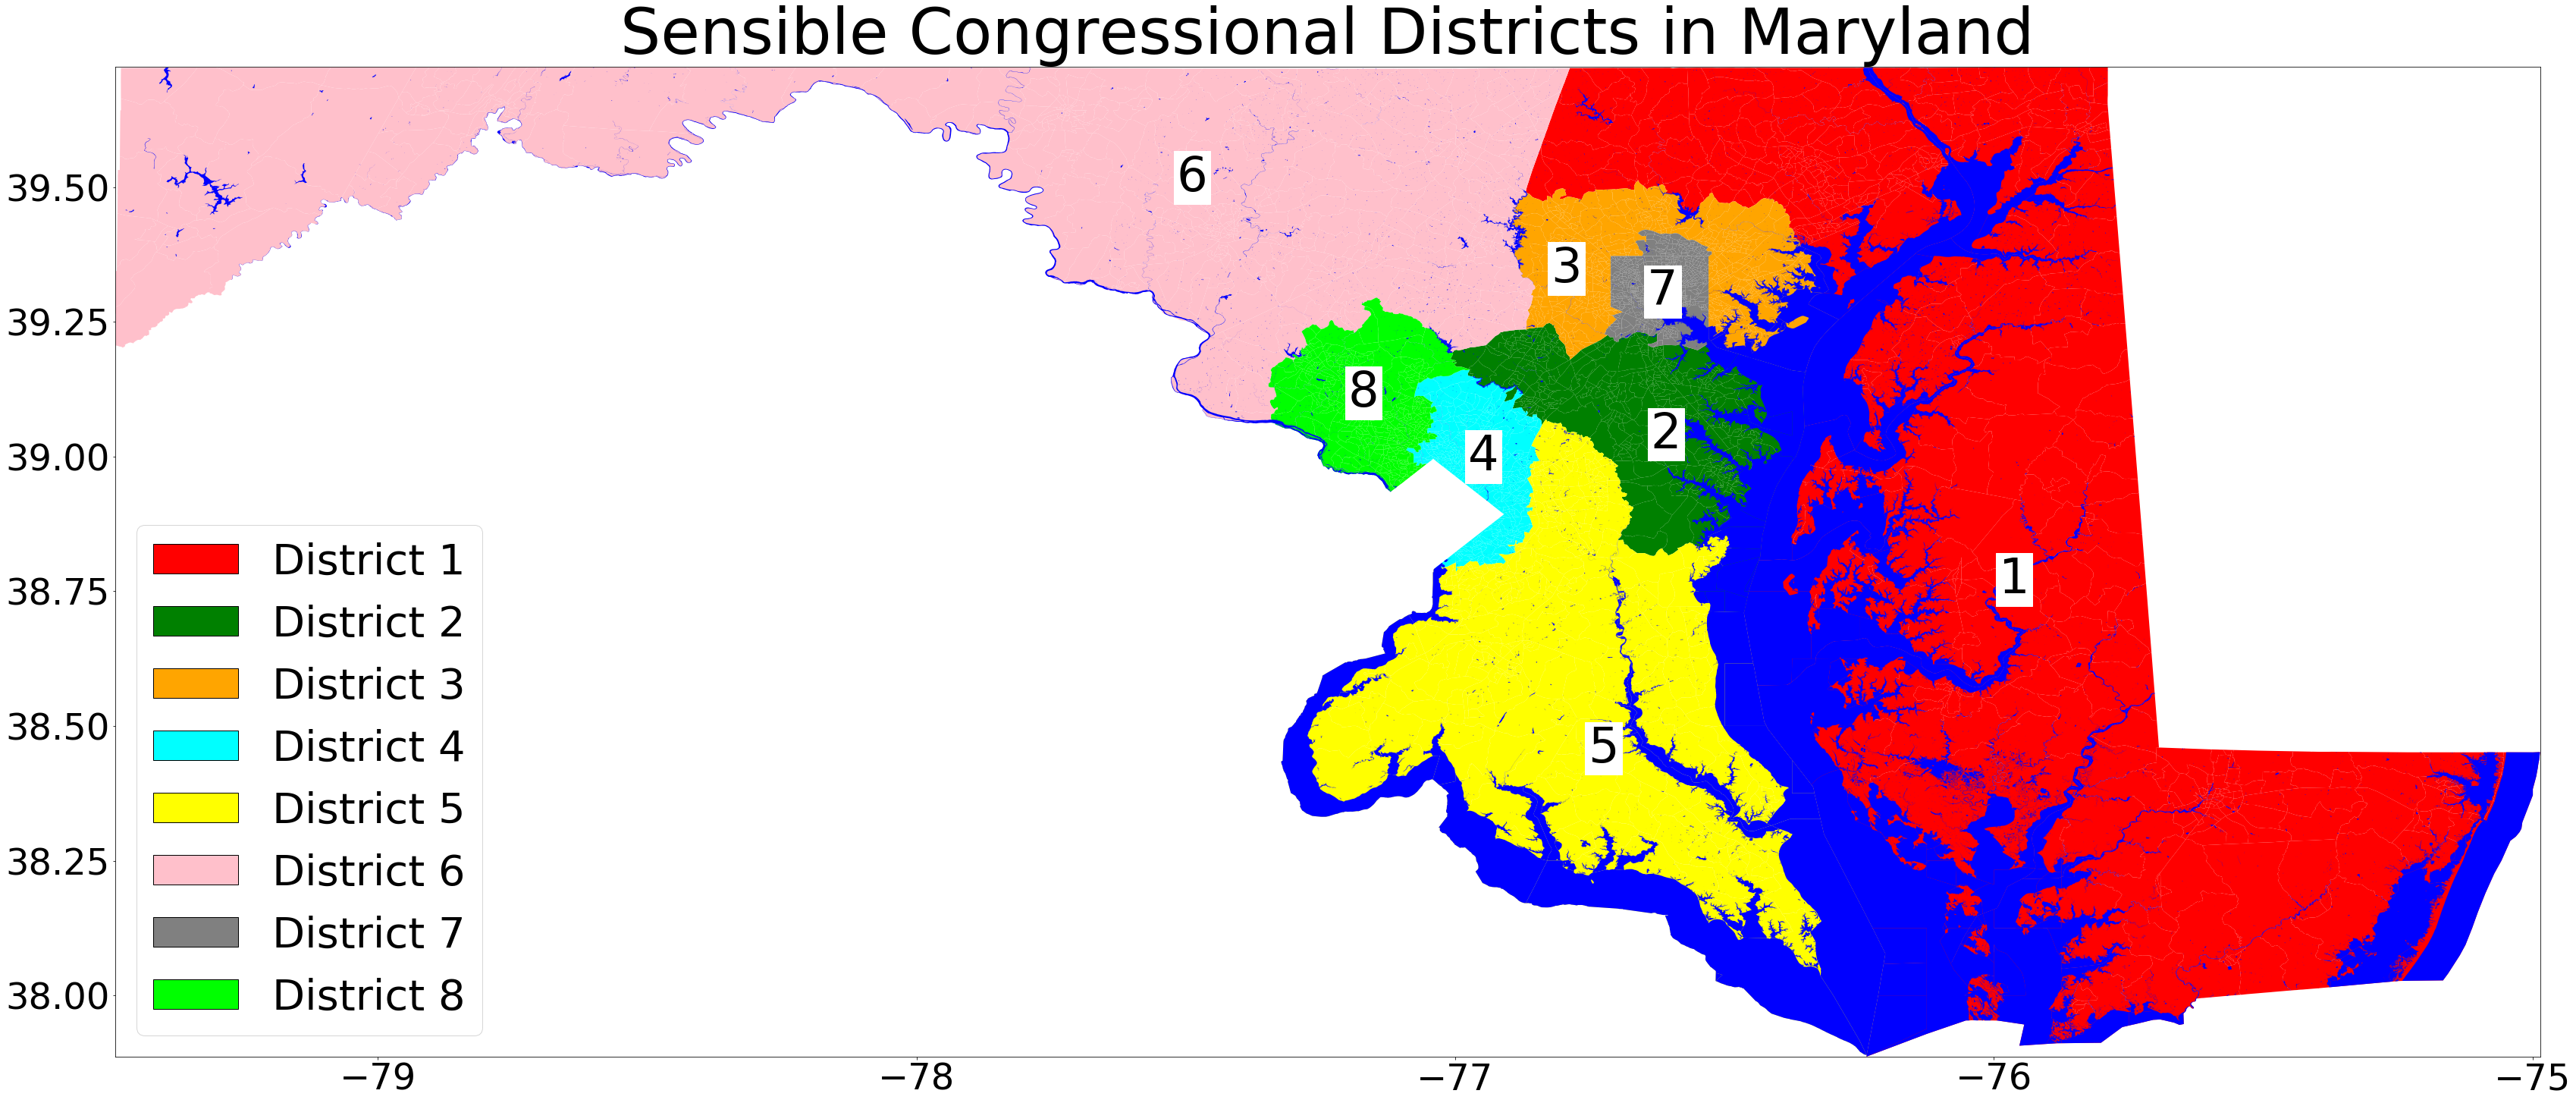

In [8]:
### legend_location = 'lower left'
basesize = 24
manual_plot_limits = False
show_places = False
show_tract_labels = False
show_block_group_labels = False

show_one_county = False
this_county_name = 'Montgomery County'

if (manual_plot_limits):
    xlimits = (-76.05,-75.8)
    ylimits = (38.7,39.1)
elif (show_one_county):
    xlimits = (unary_union(gdf[gdf['COUNTY_NAME'] == this_county_name].geometry.tolist()).bounds[0], unary_union(gdf[gdf['COUNTY_NAME'] == this_county_name].geometry.tolist()).bounds[2])
    ylimits = (unary_union(gdf[gdf['COUNTY_NAME'] == this_county_name].geometry.tolist()).bounds[1], unary_union(gdf[gdf['COUNTY_NAME'] == this_county_name].geometry.tolist()).bounds[3])
else:
    xlimits = (state_bounding_box[0],state_bounding_box[2])
    ylimits = (state_bounding_box[1],state_bounding_box[3])

xspan = xlimits[1] - xlimits[0]
yspan = ylimits[1] - ylimits[0]

# if (not(manual_plot_limits)):
#     xlimits = ((xlimits[0] - (xspan*map_buffer_ratio)), (xlimits[1] + (xspan*map_buffer_ratio)))
#     ylimits = ((ylimits[0] - (yspan*map_buffer_ratio)), (ylimits[1] + (yspan*map_buffer_ratio)))
aspect_ratio = xspan / yspan

#if ((oldi != i) | (old_map_buffer_ratio != map_buffer_ratio)):
map_area_geo = makebox(xlimits, ylimits)

map_area_gdf = geopandas.GeoDataFrame(data=[[map_area_geo]], columns=['geometry'], crs=gdf.crs, geometry='geometry')

print('Aspect ratio: {0:.3f} : 1'.format(aspect_ratio))
print('\n')

fig, ax = plt.subplots(1,1,figsize=(basesize*aspect_ratio,basesize))

legend_list = []
# gdf[gdf['new_district'] == 0].plot(ax=ax, color='white', edgecolor='black', lw=1)
# legend_list.append(mpatches.Patch(facecolor='white', edgecolor='black', lw=1, label='{0:}'.format(new_district_labels[0])))

for i in range(1, nDistricts+1):
    legend_list.append(mpatches.Patch(facecolor=district_color_cycle[i-1], edgecolor='black', lw=1, label='{0:}'.format(new_district_labels[i])))
    if (show_one_county):
        gdf[(gdf['new_district'] == i) & (gdf['COUNTY_NAME'] == this_county_name)].plot(ax=ax, color=district_color_cycle[i-1], edgecolor='black', lw=1)
    else:
        gdf[gdf['new_district'] == i].plot(ax=ax, color=district_color_cycle[i-1])#, edgecolor='black', lw=1)

if (show_tract_labels):
    print('labeling block groups...')
    #####  add labels for block groups with overlap
    b = []
    for ix, thisrow in gdf[
        (gdf['STUSAB'] == this_state) 
        & ((gdf['INTPTLON'] >= xlimits[0]) & (gdf['INTPTLON'] <= xlimits[1]))
        & ((gdf['INTPTLAT'] >= ylimits[0]) & (gdf['INTPTLAT'] <= ylimits[1]))
        #& (gdf['new_district'] == 7)
    ].iterrows():
        if (show_block_group_labels):
            b.append(ix)
            annotator = ix[11:]
        else:
            b.append(thisrow['TRACTCE'])
            annotator = thisrow['TRACTCE']
        ax.annotate(annotator, 
                         (float(thisrow['INTPTLON']), float(thisrow['INTPTLAT'])),
                         (float(thisrow['INTPTLON']), float(thisrow['INTPTLAT'])),
                     color='black', backgroundcolor='white', fontsize=32, ha='center'
                   )
    b = sorted(b)
    for i in range(0,len(b)):
        print(b[i])


water_gdf.plot(ax=ax, color='blue')

if (show_places):
    print('finding places...')
#     print('\tshowing place names...')
#     for ix, thisrow in place_gdf.iterrows():
#         if (thisrow.geometry.intersects(gdf.loc[this_block_group_id].geometry)):
#             print('\t\t',str(thisrow['NAME']))
    print('\tplotting places...')    
    place_gdf.plot(ax=ax, color='none', edgecolor='purple', lw=5)
    print('\tlabeling places...')
    for ix, thisrow in place_gdf[
        ((place_gdf['INTPTLON'] >= xlimits[0]) & (place_gdf['INTPTLON'] <= xlimits[1]))
        & ((place_gdf['INTPTLAT'] >= ylimits[0]) & (place_gdf['INTPTLAT'] <= ylimits[1]))        
    ].iterrows():
        annotator = thisrow['NAME'].upper()
        ax.annotate(annotator, (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                 color='black', backgroundcolor='white', fontsize=48, ha='center', va='center')
        #place_gdf.plot(ax=ax, color='none', edgecolor='purple')

full_districts_gdf = geopandas.GeoDataFrame(data=None, columns=['geometry'], crs=gdf.crs, geometry='geometry')
for i in range(1,nDistricts+1):
    full_districts_gdf.loc[i] = unary_union(gdf[gdf['new_district'] == i].geometry.tolist())

for ix, thisrow in full_districts_gdf.iterrows():
    annotator = ix
    centerpoint = (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y)
    if (ix == 3):
        centerpoint = (centerpoint[0] - 0.2, centerpoint[1])
    elif (ix == 6):
        centerpoint = (centerpoint[0] + 0.5, centerpoint[1])
    plt.annotate(annotator, centerpoint, ha='center', va='center', 
                 fontsize=64, color='black', backgroundcolor='white')

ax.legend(handles=legend_list, fontsize=56, loc=legend_location)
plt.title("Sensible Congressional Districts in Maryland", fontsize=84)

plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
# plt.xticks([])
# plt.yticks([])

plt.xlim(xlimits)
plt.ylim(ylimits)

plt.savefig(script_dir+'maryland-gerrymandering-new.svg', format='svg')
print('Done')


#plt.show()
